In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
from textblob import TextBlob

In [27]:
trump=pd.read_csv('trump.csv',delimiter='\t')
trump

,text,user
0,I don't care about him,Trump
1,I will be the next US president,Trump


In [14]:
biden=pd.read_csv('biden.csv',delimiter='\t')
biden

,text,user
0,I will make USA great again,Biden
1,He's a dictator,Biden


In [28]:
trump['text'][0]='a fucking candidate'
trump

,text,user
0,a fucking candidate,Trump
1,I will be the next US president,Trump


In [30]:
biden['text'][0]='i love him'
biden

,text,user
0,i love him,Biden
1,He's a dictator,Biden


In [34]:
TextBlob(biden['text'][0]).sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [49]:
TextBlob("i love him").sentiment.polarity

0.5

In [42]:
def polarity(review):
    return TextBlob(review).sentiment.polarity

In [50]:
trump['polarity']=trump['text'].apply(polarity)
biden['polarity']=biden['text'].apply(polarity)

In [52]:
biden

,text,user,polarity
0,i love him,Biden,0.5
1,He's a dictator,Biden,0.0


In [53]:
trump['expression']=np.where(trump['polarity']>0,'positive','negative')
trump.loc[trump.polarity==0,'expression']='natural'
trump

,text,user,polarity,expression
0,a fucking candidate,Trump,-0.6,negative
1,I will be the next US president,Trump,0.0,natural


In [54]:
biden['expression']=np.where(biden['polarity']>0,'positive','negative')
biden.loc[biden.polarity==0,'expression']='natural'
biden

,text,user,polarity,expression
0,i love him,Biden,0.5,positive
1,He's a dictator,Biden,0.0,natural


<AxesSubplot:xlabel='count', ylabel='expression'>

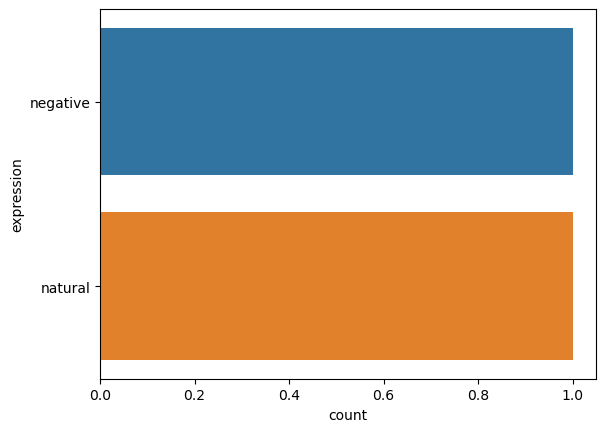

In [57]:
sns.countplot(y=trump['expression'])